# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [2]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [8]:
#in order to  test whether the mean of GPU1 is equal to zero,we will check the value of 'p'

Step 1: Decide the significance level Here we select α = 0.05
Step 2: Perform t-test

In [7]:
stats.ttest_1samp(GPU1,0)

Ttest_1sampResult(statistic=34.056241516158195, pvalue=7.228892044970457e-15)

In [ ]:
# As we can see p value is less than 0.05 so we will reject null hypothesis it means mean of GPU1 is not zero

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html


Step 1:
Decide the significance level
Here we select α = 0.05

Step 2:
Perform t-test

In [9]:
stats.ttest_ind(GPU1,GPU2)

Ttest_indResult(statistic=-2.627629513471839, pvalue=0.013794282041452725)

in this example, p value is 0.013794282041452725 and it is less than our chosen level of signifance at 5%
So the statistical decision is to reject the null hypothesis at 5% level of significance.

In [ ]:
# As the p value is less than alpha(5%)so we will reject null hypothesis,it states that there is significane difference betweeen data sets 

## Question 3

He is trying a third GPU - GPU3.

In [12]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

Step 1: State the null and alternative hypothesis:
H0:𝜇1=𝜇2
𝐻𝐴;At least one of 𝜇 differ

Step 2:
Decide the significance level
Here we select α = 0.05

Step 3:
Perform t-test

In [13]:
stats.ttest_ind(GPU1,GPU3)

Ttest_indResult(statistic=-1.4988943759093303, pvalue=0.14509210993138993)

in this example, p value is 0.14509210993138993 and it is more than our chosen level of signifance at 5%
So the statistical decision is to accept the null hypothesis at 5% level of significance

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [14]:
import numpy as np
import scipy.stats as stats

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

 Step 1:Decide the significance level Here we select α = 0.05
 Step 2:Conduct levene Test

In [16]:
stats.levene(e1,e2,e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

AS P value is greater than alpha(5%) we accept null hypothesis it means the variance are equal for three data set above

Annova Test

In [23]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

Test_df = pd.DataFrame()

df1 = pd.DataFrame({'Experiment': '1', 'Result':e1})
df2 = pd.DataFrame({'Experiment': '2', 'Result':e2})
df3 = pd.DataFrame({'Experiment': '3', 'Result':e3})

Test_df = Test_df.append(df1) 
Test_df = Test_df.append(df2) 
Test_df = Test_df.append(df3) 

Test_df.head()



,Experiment,Result
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


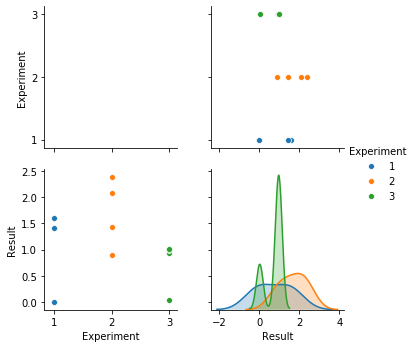

In [24]:
#lets explore data graphically

sns.pairplot(Test_df,diag_kind='kde',hue='Experiment')

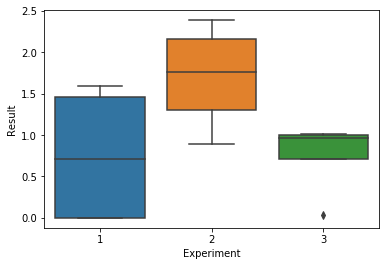

In [25]:
sns.boxplot(x = "Experiment", y = "Result", data = Test_df)
plt.show()


The boxplots show almost dissimilar shapes, location and spreads and there is an low outlier

Step 1: State the null and alternative hypothesis:
H0:𝜇1=𝜇2=𝜇3
𝐻𝐴;At least one of 𝜇 differ

Step 2:
Decide the significance level
Here we select α = 0.05

Step 3
Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

Step 4:

Calculate p value using ANOVA table
statsmodels.formula.api.ols creates a model from a formula and dataframe
statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models


In [30]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Result ~ Experiment', data =Test_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq   df         F    PR(>F)
Experiment  2.399066  2.0  2.513576  0.135746
Residual    4.294994  9.0       NaN       NaN


Step 5:Decide to reject or accept null hypothesis
n this example, p value is 0.135746 and it is more than our chosen level of signifance at 5%
So the statistical decision is to accept null hypothesis at 5% level of significance.
    

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

Step 1: State the null and alternative hypothesis:
H0:𝜇1=𝜇2=𝜇3
𝐻𝐴;At least one of 𝜇 differ

Step 2:
Decide the significance level
Here we select α = 0.05

Step 3:
Perform f_onway test


In [31]:
 stats.f_oneway(e1,e2,e3)

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

As the pvalue is more than more than our chosen level of signifance at 5% 
So the statistical decision is to accept null hypothesis at 5% level of significance.

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type 1-Type 1 error occurs when null hypothesis is true but it is rejected

Type 2-Type 2 roor occurs when null hypothesis is false but it is accepted

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:



Null hypothesis- The waiting time to place an order has not changed from 4.5 minutes 

Alternative hypothesis-The waiting time to place an order has changed from 4.5 minutes 


## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [32]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [33]:
dice

array([[ 5,  8,  3,  8],
       [ 9,  6,  8,  5],
       [ 8, 12,  7,  2],
       [ 4, 16,  7,  3],
       [ 3,  9,  6,  5],
       [ 7,  2,  5,  7]])

Step 1: State the null and alternative hypothesis:

Step 2: select significane level α = 0.01


In [48]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))


Chi-square statistic 23.31567 P value 0.077664 Degrees of freedom 15


In [50]:
stats.chi2_contingency(dice)

(23.315671914716496,
 0.07766367301496693,
 15,
 array([[ 5.57419355,  8.20645161,  5.57419355,  4.64516129],
        [ 6.50322581,  9.57419355,  6.50322581,  5.41935484],
        [ 6.73548387,  9.91612903,  6.73548387,  5.61290323],
        [ 6.96774194, 10.25806452,  6.96774194,  5.80645161],
        [ 5.34193548,  7.86451613,  5.34193548,  4.4516129 ],
        [ 4.87741935,  7.18064516,  4.87741935,  4.06451613]]))


In this example, p value is  0.077664 and > 0.01 so we accept the null hypothesis.


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [36]:
A=stats.zscore(dice)

In [37]:
A

array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

In [39]:
p_values = stats.norm.sf(abs(A))

In [40]:
p_values

array([[0.32171442, 0.42510621, 0.03309629, 0.07477068],
       [0.08245741, 0.26041025, 0.11033568, 0.5       ],
       [0.17726974, 0.23649578, 0.27014569, 0.07477068],
       [0.17726974, 0.05217856, 0.27014569, 0.16833418],
       [0.08245741, 0.48493574, 0.5       , 0.5       ],
       [0.32171442, 0.06074513, 0.27014569, 0.16833418]])

In [42]:
np.mean(p_values)

0.23428473233691496

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [15]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

State the null and alternative hypothesis
Null Hypothesis : There is no significant difference
Alternate Hypothesis : There is a significant difference

Step 2:
Decide the significance level Here we select α = 0.05

In [16]:
 t_statistic,p_value=stats.ttest_rel(before,after)

In [17]:
print(t_statistic, p_value)

6.81894450784921 2.6588298627762048e-11


Step 3
Decide to reject or accept null hypothesis 
in this example, p value is 2.6588298627762048e-11 and it is less than our chosen level of signifance at 5% So the statistical decision is to reject null hypothesis at 5% level of significance
It states that there is a significant difference .